# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [6]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [7]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [8]:
# Extract all rows of data
data_table = soup.find('table', class_='table')
data_table

<table class="table">
<tbody><tr>
<th>id</th>
<th>terrestrial_date</th>
<th>sol</th>
<th>ls</th>
<th>month</th>
<th>min_temp</th>
<th>pressure</th>
</tr>
<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>
<tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>
<tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>
<tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>
<tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [9]:
# Create an empty list
data = {
    "id": [],
    "terrestrial_date": [],
    "sol": [],
    "ls": [],
    "month": [],
    "min_temp": [],
    "pressure": []
}

# Loop through the scraped data to create a list of rows
for row in data_table.find_all('tr')[1:]:  # [1:] skips the header row
    # Get all cells in the row
    cells = row.find_all('td')
    if len(cells) == 7:  # Ensure there are exactly 7 cells as expected
        # Append each cell's text to the respective list in data
        data["id"].append(cells[0].text.strip())
        data["terrestrial_date"].append(cells[1].text.strip())
        data["sol"].append(cells[2].text.strip())
        data["ls"].append(cells[3].text.strip())
        data["month"].append(cells[4].text.strip())
        data["min_temp"].append(cells[5].text.strip())
        data["pressure"].append(cells[6].text.strip())

In [10]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(data)

In [12]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [13]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [14]:
# Change data types for data analysis
mars_df['sol'] = mars_df['sol'].astype('int')  # Convert 'sol' to integer
mars_df['ls'] = mars_df['ls'].astype('int')  # Convert 'ls' to integer
mars_df['month'] = mars_df['month'].astype('int')  # Convert 'month' to integer
mars_df['min_temp'] = mars_df['min_temp'].astype('float')  # Convert 'min_temp' to float
mars_df['pressure'] = mars_df['pressure'].astype('float')  # Convert 'pressure' to float
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])  # Convert 'terrestrial_date' to datetime

In [15]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [16]:
# 1. How many months are there on Mars?
unique_months = mars_df['month'].unique()
print("Unique Martian months:", unique_months)
print("Number of Martian months:", len(unique_months))

Unique Martian months: [ 6  7  8  9 10 11 12  1  2  3  4  5]
Number of Martian months: 12


In [17]:
# 2. How many sols (Martian days) worth of data are there?
unique_sols = mars_df['sol'].nunique()
unique_sols

1867

In [18]:
# 3. What is the average minimum temperature by month?
avg_min_temp_by_month = mars_df.groupby('month')['min_temp'].mean()
avg_min_temp_by_month

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

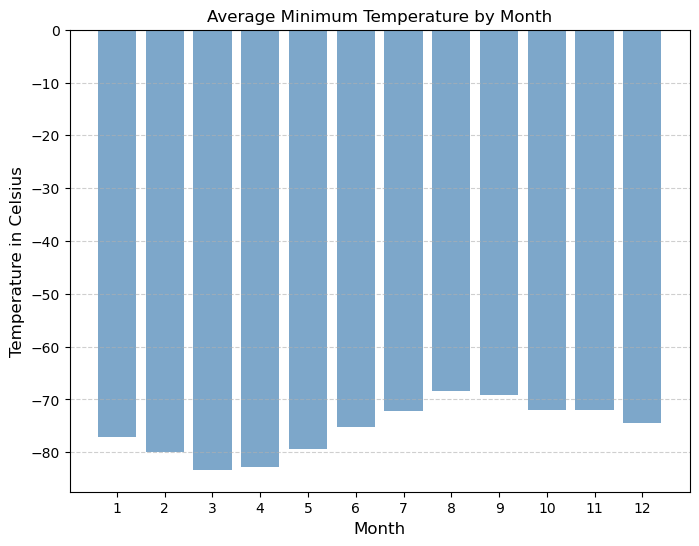

In [ ]:
# Plot the average minimum temperature by month
plt.figure(figsize=(8, 6))
plt.bar(avg_min_temp_by_month.index, avg_min_temp_by_month.values, color='Steelblue', alpha=0.7)
plt.title('Average Minimum Temperature by Month', fontsize=12)
plt.xlabel('month', fontsize=12)
plt.ylabel('Temperature in Celsius', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=range(1, 13))  # Ensure the x-axis shows months 1–12
plt.grid(axis='y', linestyle='--', alpha=0.6)

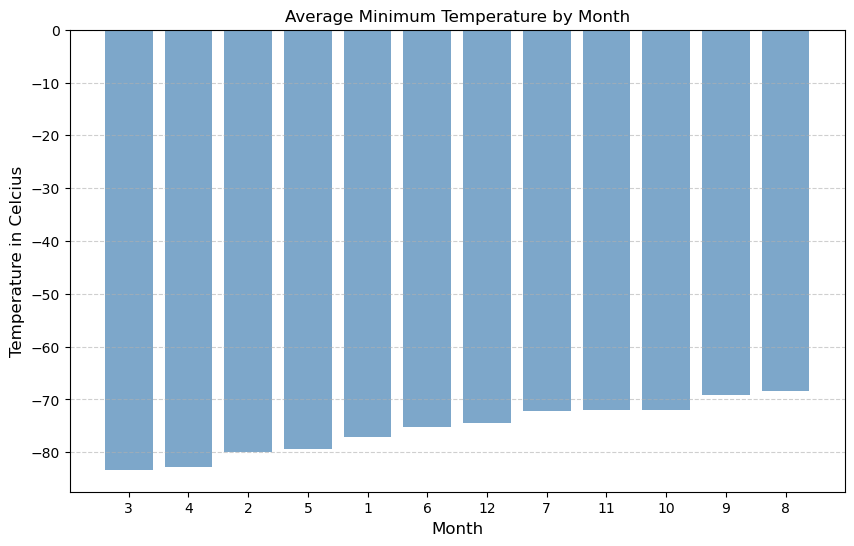

In [ ]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Sort the data to identify the coldest and hottest months
sorted_temps = avg_min_temp_by_month.sort_values()


# Plot the sorted data
plt.figure(figsize=(10, 6))
plt.bar(range(1,13), sorted_temps.values, color='steelblue', alpha=0.7)
plt.title('Average Minimum Temperature by Month', fontsize=12)
plt.xlabel('month', fontsize=12)
plt.ylabel('Temperature in Celcius', fontsize=12)
plt.xticks(ticks=range(1,13), labels=sorted_temps.index)
plt.grid(axis='y', linestyle='--', alpha=0.6)



In [44]:
# 4. What is the average pressure by month?
avg_pressure_by_month = mars_df.groupby('month')['pressure'].mean()
avg_pressure_by_month

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

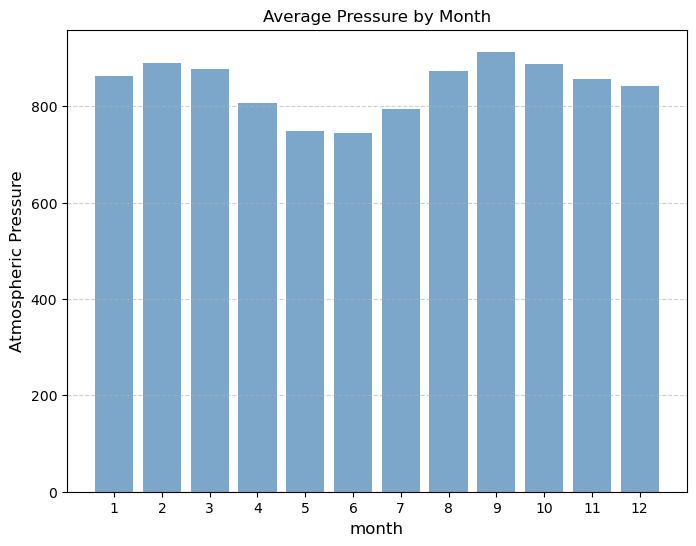

In [46]:
# Plot the average pressure by month
plt.figure(figsize=(8, 6))
plt.bar(avg_pressure_by_month.index, avg_pressure_by_month.values, color='Steelblue', alpha=0.7)
plt.title('Average Pressure by Month', fontsize=12)
plt.xlabel('month', fontsize=12)
plt.ylabel('Atmospheric Pressure', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=range(1, 13))  # Ensure the x-axis shows months 1–12
plt.grid(axis='y', linestyle='--', alpha=0.6)

In [62]:
sorted_pressures = avg_pressure_by_month.sort_values()
sorted_pressures

month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64

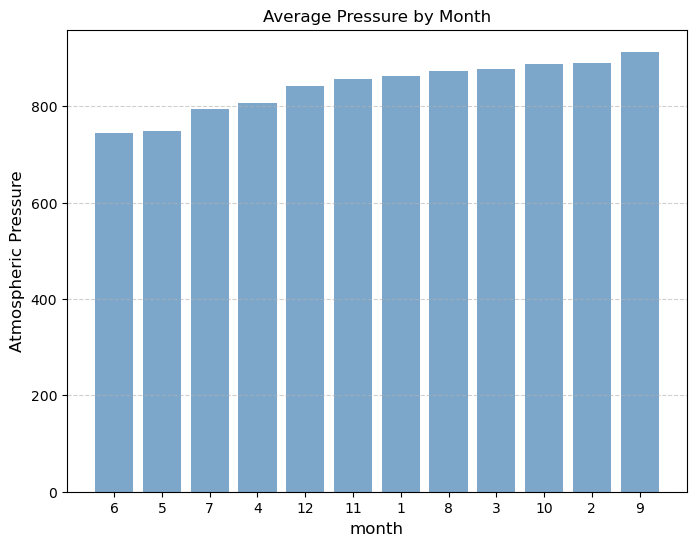

In [48]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph

sorted_pressures = avg_pressure_by_month.sort_values()
sorted_pressures

# Plot the average pressure by month in ascending order of pressure
plt.figure(figsize=(8, 6))
plt.bar(range(1,13), sorted_pressures.values, color='Steelblue', alpha=0.7)
plt.title('Average Pressure by Month', fontsize=12)
plt.xlabel('month', fontsize=12)
plt.ylabel('Atmospheric Pressure', fontsize=12)
plt.xticks(ticks=range(1, 13), labels=sorted_pressures.index)  # Ensure the x-axis shows months 1–12
plt.grid(axis='y', linestyle='--', alpha=0.6)

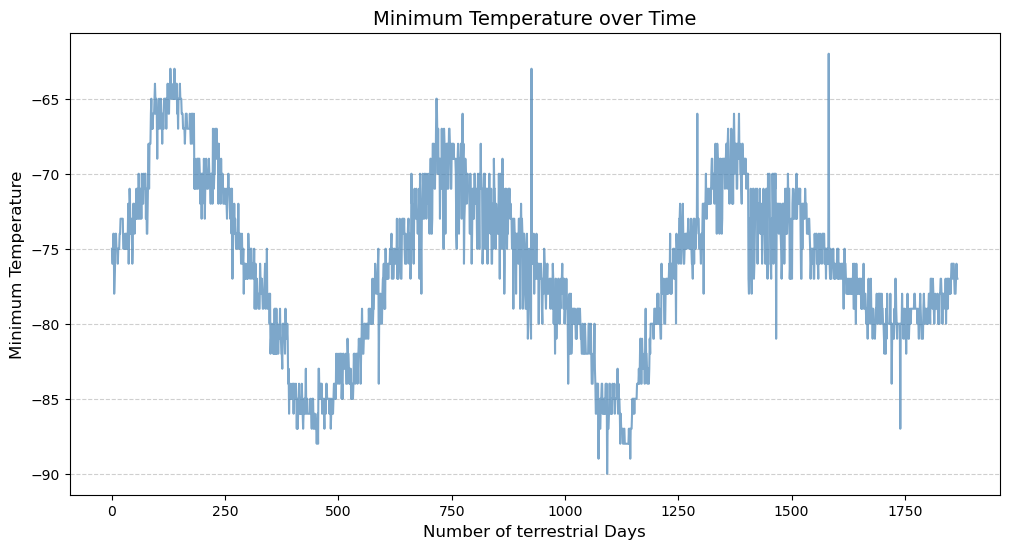

In [61]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.

# Sort the DataFrame by terrestrial_date for proper plotting
mars_df = mars_df.sort_values(by='terrestrial_date')

# Plot the daily minimum temperature
plt.figure(figsize=(12, 6))
plt.plot(mars_df.index, mars_df['min_temp'], color='steelblue', alpha=0.7)
plt.title('Minimum Temperature over Time', fontsize=14)
plt.xlabel('Number of terrestrial Days', fontsize=12)
plt.ylabel('Minimum Temperature', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
#plt.tight_layout()

# Show the plot
plt.show()


#### Minimum Temperature

YOUR ANALYSIS HERE

The minimum average temperature (= -83.307292) on Mars, occurs in the 3rd month.
The maximum averge temperature (=-68.382979) on Mars, occurs in the 8th month.

#### Atmospheric Pressure

YOUR ANALYSIS HERE

The mimimum average pressure (= 745.054422) on Mars, occurs in the 6th month.
The maximum average pressure (= 913.305970) on Mars, occurs in the 9th month.

#### Year Length

YOUR ANALYSIS HERE
From the minimum temperature over time graph, visually the troughs (minimum temperatures) occur around the days 450, 1100 and 1750, with intervals of aproximately 650 days each. Similarly the peaks (maximum temperatures) occur around days 100, 750 and 1400, with interval of 650 also.

Therefore there are approximately 650 terrestrial (Earth) days in a Martian year.


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [65]:
# Write the data to a CSV

output_file = 'mars_data.csv'
mars_df.to_csv(output_file, index=False)  # index=False avoids writing the DataFrame index as a column

In [22]:
browser.quit()